In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
from geonamescache.mappers import country
import re
import matplotlib.pyplot as plt

In [2]:
##Company details
companies = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt', sep='\t',  encoding = 'ANSI')

##Funding round details
rounds2 = pd.read_csv('file:///C:/Users/Harika/Documents/ML & AI/rounds2.csv',  encoding = 'ANSI')

##Sector Classification
Sector_mapping = pd.read_csv('file:///C:/Users/Harika/Documents/ML & AI/mapping.csv',  encoding = 'ANSI')

In [3]:
##Converting to letters to lower case and removing unwanted text from permalink column
companies['permalink'] = companies['permalink'].apply(lambda x: " ".join(x.lower() for x in x.split()))
companies['permalink'] = companies['permalink'].replace(to_replace=['/organization/-','/organization/','-'], value="",regex=True)

In [4]:
##Calculating no. of unique companies 
companies['permalink'].nunique()

66290

In [5]:
##Checking the percentage of missing values in each column
percent_missing = ((companies.isnull() | companies.isna()).sum() * 100 / companies.index.size)
print(percent_missing)

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64


In [6]:
##Removing columns that are not used for analysis having higher percentage of missing values to avoid high data loss
removeddata = companies[['founded_at', 'state_code', 'state_code', 'city','homepage_url']]
companies = companies.drop(removeddata, axis=1)

In [7]:
companies.head()

,permalink,name,category_list,status,country_code,region
0,fame,#fame,Media,operating,IND,Mumbai
1,qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE - Other
2,theoneoftheminc,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN
3,06com,0-6.com,Curated Web,operating,CHN,Beijing
4,004technologies,004 Technologies,Software,operating,USA,"Springfield, Illinois"


In [8]:
##removing missing values
companies.dropna(inplace = True)

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56764 entries, 0 to 66366
Data columns (total 6 columns):
permalink        56764 non-null object
name             56764 non-null object
category_list    56764 non-null object
status           56764 non-null object
country_code     56764 non-null object
region           56764 non-null object
dtypes: object(6)
memory usage: 3.0+ MB


In [10]:
##unique companies in rounds2
#converting to lowercase letters
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#removing unwanted words/symbols which don't make sense
rounds2['company_permalink'] = rounds2['company_permalink'].replace(to_replace=['/organization/-','/organization/', '-'], value="",regex=True)

In [11]:
##Calculating no. of unique companies 
rounds2['company_permalink'].nunique()

66290

In [12]:
##Checking the percentage of missing values in each column
percent_missing_rounds = ((rounds2.isnull() | rounds2.isna()).sum() * 100 / rounds2.index.size)
print(percent_missing_rounds)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64


In [13]:
##Removing columns that are not used for analysis having higher percentage of missing values to avoid high data loss
removeddata = rounds2[['funding_round_code']]
rounds2 = rounds2.drop(removeddata, axis=1)

In [14]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,theoneoftheminc,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,06com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [15]:
##removing missing values
rounds2.dropna(inplace = True)

In [16]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


In [17]:
##merging rounds2 & companies dataframes to create master_frame
master_frame = pd.merge(rounds2,companies,how='inner',left_on ='company_permalink', right_on = 'permalink')

In [18]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87516 entries, 0 to 87515
Data columns (total 11 columns):
company_permalink          87516 non-null object
funding_round_permalink    87516 non-null object
funding_round_type         87516 non-null object
funded_at                  87516 non-null object
raised_amount_usd          87516 non-null float64
permalink                  87516 non-null object
name                       87516 non-null object
category_list              87516 non-null object
status                     87516 non-null object
country_code               87516 non-null object
region                     87516 non-null object
dtypes: float64(1), object(10)
memory usage: 8.0+ MB


In [19]:
##Subsetting the data in master_frame with selected fund types and funding amount between 5M & 15M
fund_type = ['venture','seed', 'angel', 'private_equity']
fundingtype_subset = master_frame.loc[master_frame['funding_round_type'].isin(fund_type)]


In [20]:
fundingtype_subset['funding_round_type'].value_counts()

venture           47312
seed              20795
angel              4349
private_equity     1786
Name: funding_round_type, dtype: int64

In [21]:
##checking the amount millions
round(((fundingtype_subset.groupby(['funding_round_type']).mean()))/1000000 )

,raised_amount_usd
funding_round_type,
angel,1.0
private_equity,71.0
seed,1.0
venture,12.0


In [22]:
fundingtype_subset = fundingtype_subset.loc[(5000000 <= fundingtype_subset['raised_amount_usd']) & (fundingtype_subset['raised_amount_usd']>= 15000000)] 

In [23]:
##subsetting the data with only venture fund type
venture_data = fundingtype_subset.loc[fundingtype_subset['funding_round_type'] == 'venture'] 

In [24]:
venture_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9820 entries, 7 to 87485
Data columns (total 11 columns):
company_permalink          9820 non-null object
funding_round_permalink    9820 non-null object
funding_round_type         9820 non-null object
funded_at                  9820 non-null object
raised_amount_usd          9820 non-null float64
permalink                  9820 non-null object
name                       9820 non-null object
category_list              9820 non-null object
status                     9820 non-null object
country_code               9820 non-null object
region                     9820 non-null object
dtypes: float64(1), object(10)
memory usage: 920.6+ KB


In [25]:
##extracting the top 9 countries
country_grps = venture_data.pivot_table(values=['raised_amount_usd'], index=['country_code'], aggfunc=np.sum)
data_sorted = round(country_grps.sort_values(['raised_amount_usd'], ascending=False))
round(data_sorted.head(9))

,raised_amount_usd
country_code,
USA,2.942897e+11
CHN,3.222441e+10
GBR,1.238023e+10
IND,1.113765e+10
CAN,4.976888e+09
DEU,4.062514e+09
FRA,3.728109e+09
ISR,3.413256e+09
JPN,2.227212e+09


In [26]:
##Creating the dataframe with top 9 countries
top9 = venture_data.loc[venture_data['country_code'].isin (['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN'])]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,region
7,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area
48,1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,08-03-2010,35000000.0,1010data,1010data,Software,acquired,USA,New York City
52,10xgenomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,12-01-2015,55000000.0,10xgenomics,10X Genomics,Biotechnology|Technology,operating,USA,SF Bay Area
57,117go,/funding-round/bbbda407fa8638d944ecfdd042230c4b,venture,28-04-2014,20000000.0,117go,117go,Social Travel,operating,CHN,Shanghai
77,1366technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,1366technologies,1366 Technologies,Manufacturing,operating,USA,Boston


In [27]:
##dataframe of countries with english as official language
english_countries = pd.read_csv('file:///C:/Users/Harika/Documents/ML & AI/list_of_english-speaking_countries_in_the_world-2177j_1.csv', encoding = 'ANSI')

In [28]:
##mapping the countries in english_countries dataframe to iso3 codes
mapper = country(from_key='name', to_key='iso3')
english_countries['country_code'] = english_countries['Country'].apply(lambda x: mapper(x))
english_countries.head()

,Country,Population,Status Of English As A Language,country_code
0,India,1247540000,de jure official language,IND
1,United States,318224000,de facto official language,USA
2,United Kingdom,63705000,de facto official language,GBR
3,Nigeria,218093000,de jure official language,NGA
4,Pakistan,165449000,de jure official language,PAK


In [29]:
##Checking the top 3 english speaking countries
print(english_countries.nlargest(3, 'Population'))

         Country  Population Status Of English As A Language country_code
0          India  1247540000       de jure official language          IND
1  United States   318224000      de facto official language          USA
3        Nigeria   218093000       de jure official language          NGA


In [30]:
##mapping the sector
mapping = pd.melt(Sector_mapping, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])

In [31]:
mapping = mapping.drop(mapping[['value']], axis = 1)

In [32]:
##merging fundingtype_subset with mapping
fundingtype_subset = fundingtype_subset.merge(mapping, on='category_list', how='left')
fundingtype_subset = fundingtype_subset.rename({'variable': 'main_sector'}, axis = 1)

In [33]:
##Deriving the primary sector
fundingtype_subset['primary_sector'] = fundingtype_subset['category_list'].apply(lambda x: x.split('|')[0])

In [34]:
D1 = fundingtype_subset.loc[(fundingtype_subset['country_code'] == 'USA')] 

In [36]:
print(D1.raised_amount_usd.count())
print(D1.raised_amount_usd.sum())

36138
1503188572073.0


In [37]:
D2 = fundingtype_subset.loc[(fundingtype_subset['country_code'] == 'CHN')] 

In [38]:
print(D2.raised_amount_usd.count())
print(D2.raised_amount_usd.sum())

2710
186805090674.0


In [39]:
D3 = fundingtype_subset.loc[(fundingtype_subset['country_code'] == 'GBR')]

In [40]:
print(D3.raised_amount_usd.count())
print((D3.raised_amount_usd.sum())/70)

1827
1203472752.8285713


In [41]:
D1.primary_sector.value_counts()

Biotechnology                    9435
Software                         3209
Health Care                      2710
Clean Technology                 2608
Semiconductors                   1667
Enterprise Software              1539
Hardware + Software              1243
Mobile                           1132
Web Hosting                       993
E-Commerce                        834
Advertising                       830
Health and Wellness               783
Security                          737
Manufacturing                     570
Games                             509
Curated Web                       441
Analytics                         286
Pharmaceuticals                   280
Technology                        273
Consulting                        230
Hospitality                       200
News                              152
Real Estate                       145
Messaging                         142
Public Relations                  138
Finance                           133
Fashion     

In [42]:
D2.primary_sector.value_counts()

E-Commerce                     567
Advertising                    164
Biotechnology                  145
Mobile                         129
Travel                         120
Social Media                   120
Games                          115
Photography                    113
Software                       107
Manufacturing                   73
Curated Web                     69
Education                       69
Clean Technology                66
Real Estate                     56
Health and Wellness             55
Health Care                     47
Public Transportation           46
Semiconductors                  40
Fashion                         36
Automotive                      34
Enterprise Software             34
Classifieds                     32
Internet                        28
Music                           24
Pharmaceuticals                 24
Payments                        24
Consulting                      18
Finance                         18
News                

In [43]:
D3.primary_sector.value_counts()

Biotechnology              441
Software                   185
Mobile                     144
Clean Technology           120
E-Commerce                  76
Enterprise Software         58
Semiconductors              57
Hardware + Software         57
Consulting                  56
Web Hosting                 48
Manufacturing               48
Curated Web                 44
Advertising                 38
Games                       26
Technology                  26
Food Processing             24
Messaging                   24
Internet                    18
Telecommunications          18
Security                    16
Music                       16
Pharmaceuticals             16
Network Security            16
Travel                      16
P2P Money Transfer          16
Finance                     15
Health Care                 12
Apps                        12
Bio-Pharm                    9
Customer Service             8
                          ... 
Career Planning              1
Location

In [44]:
##company which received highest investment from C1 for top sector
D1_group = D1.groupby(['primary_sector', 'permalink'])['raised_amount_usd'].sum().reset_index()
ecommerce = D1_group.loc[D1_group['primary_sector'] == 'E-Commerce']
print(round(ecommerce.nlargest(1, 'raised_amount_usd')))

     primary_sector permalink  raised_amount_usd
2704     E-Commerce  fanatics       4.960000e+09


In [45]:
##company which received highest investment from C2 for top sector
D2_group = D2.groupby(['primary_sector', 'permalink'])['raised_amount_usd'].sum().reset_index()
Biotechnology = D2_group.loc[D2_group['primary_sector'] == 'Biotechnology']
print(round(Biotechnology.nlargest(1, 'raised_amount_usd')))

   primary_sector permalink  raised_amount_usd
53  Biotechnology   beigene       1.372800e+09


In [58]:
##company which received highest investment from C3 for top sector
D3_group = D3.groupby(['primary_sector', 'permalink'])['raised_amount_usd'].sum().reset_index()
Technology = D3_group.loc[D3_group['primary_sector'] == 'Technology']
print(round(Technology.nlargest(1, 'raised_amount_usd')))

    primary_sector permalink  raised_amount_usd
266     Technology    oneweb       4.000000e+09


In [47]:
D3_group.head()

,primary_sector,permalink,raised_amount_usd
0,Accounting,geniac,34406898.0
1,Accounting,mythings,15000000.0
2,Advertising,icrossing,95000000.0
3,Advertising,livebookings,40000000.0
4,Advertising,mediaingenuity,228696240.0


In [48]:
##company which received highest investment from C1 for second top sector
Software = D1_group.loc[D1_group['primary_sector'] == 'Software']
print(round(Software.nlargest(1, 'raised_amount_usd')))

     primary_sector permalink  raised_amount_usd
5147       Software    vmware       2.948000e+09


In [49]:
##company which received highest investment from C2 for second top sector
Software = D2_group.loc[D2_group['primary_sector'] == 'Software']
print(round(Software.nlargest(1, 'raised_amount_usd')))

    primary_sector permalink  raised_amount_usd
392       Software     wacai        520000000.0


In [50]:
##company which received highest investment from C3 for second top sector
Telecommunication = D3_group.loc[D3_group['primary_sector'] == 'Telecommunications']
print(round(Telecommunication.nlargest(1, 'raised_amount_usd')))

         primary_sector           permalink  raised_amount_usd
270  Telecommunications  heliostowersafrica       5.040000e+09


In [51]:
##calculating fraction for plot1
fundingtype_subset['amount_fraction'] = fundingtype_subset['raised_amount_usd']/fundingtype_subset['raised_amount_usd'].sum()
fundingtype_subset.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,region,main_sector,primary_sector,amount_fraction
0,0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,0xdata,H2O.ai,Analytics,operating,USA,SF Bay Area,NaN,Analytics,0.000009
1,1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,08-03-2010,35000000.0,1010data,1010data,Software,acquired,USA,New York City,Automotive & Sports,Software,0.000016
2,1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,08-03-2010,35000000.0,1010data,1010data,Software,acquired,USA,New York City,Cleantech / Semiconductors,Software,0.000016
3,1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,08-03-2010,35000000.0,1010data,1010data,Software,acquired,USA,New York City,Entertainment,Software,0.000016
4,1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,08-03-2010,35000000.0,1010data,1010data,Software,acquired,USA,New York City,Health,Software,0.000016


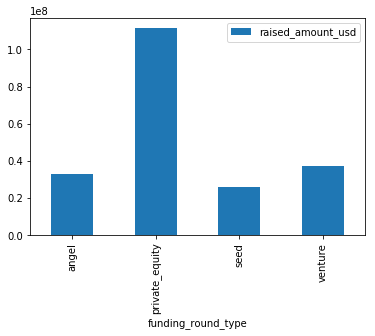

In [52]:
##plot showing the the average amount of investment in each funding type 
plot1 = round(fundingtype_subset.pivot_table(values=['raised_amount_usd'], index=['funding_round_type'], aggfunc=np.mean))
plot1.plot(kind='bar')
plt.show()

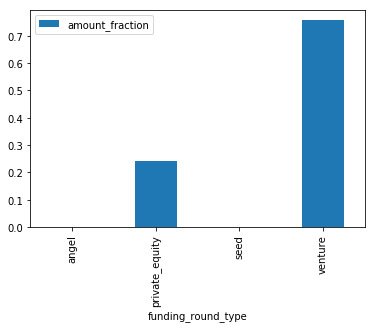

In [53]:
##plot showing the fraction of total investments (globally) in venture, seed, and private equity
plot1_fraction = fundingtype_subset.pivot_table(values=['amount_fraction'], index=['funding_round_type'], aggfunc=np.sum)
plot1_fraction.plot(kind='bar')
plt.show()

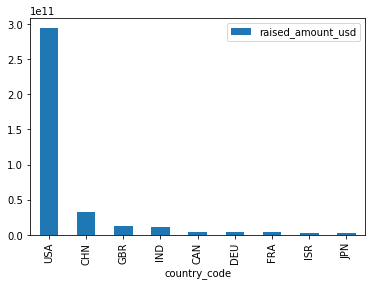

In [54]:
##plot showing the top 9 countries against the total amount of investments of funding type FT
plot1_fraction = top9.pivot_table(values=['raised_amount_usd'], index=['country_code'], aggfunc=np.sum)
plot1_fraction_sorted = round(plot1_fraction.sort_values(['raised_amount_usd'], ascending=False))
plot1_fraction_sorted.plot(kind='bar')
plt.show()

In [55]:
##plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
D1_plot = D1.groupby("primary_sector").raised_amount_usd.count().reset_index()
D1_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D1_plot = D1_plot.head(3)


D2_plot = D2.groupby("primary_sector").raised_amount_usd.count().reset_index()
D2_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D2_plot = D2_plot.head(3)


D3_plot = D3.groupby("primary_sector").raised_amount_usd.count().reset_index()
D3_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D3_plot = D3_plot.head(3)
D12 = pd.merge(D1_plot,D2_plot,how='outer',on='primary_sector')
D123 = pd.merge(D12,D3_plot,how='outer',on='primary_sector')



In [56]:
D123 = D123.rename(columns={"raised_amount_usd_x": "USD", "raised_amount_usd_y": "GBP" ,"raised_amount_usd": "INR"})
D123= D123.set_index("primary_sector")
D123.head()
D123.fillna(0)

,USD,GBP,INR
primary_sector,,,
Biotechnology,9435.0,145.0,441.0
Software,3209.0,0.0,185.0
Health Care,2710.0,0.0,0.0
E-Commerce,0.0,567.0,0.0
Advertising,0.0,164.0,0.0
Mobile,0.0,0.0,144.0


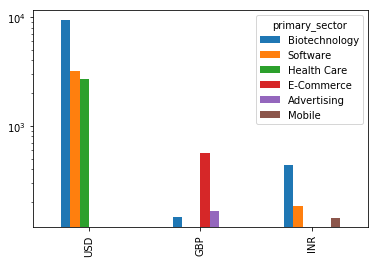

In [57]:
D123.T.plot.bar(logy=True)